импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import Trainer
from tkan import TKAN


import matplotlib.pyplot as plt
#путь к корню директории
PATH_TO = 'D:/pg/air/'
sys.path.append(os.path.abspath(PATH_TO))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", 

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", 

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", 

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = PATH_TO + 'data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
model = TKAN( 
    # input_size = X_train.shape[1], # window_size*num_features - 1
    # output_size = target_window_size,
    100, 
    sub_kan_configs=['relu', 'relu', 'relu', 'relu', 'relu'], 
    return_sequences=True, 
    use_bias=True,
    device = device)

trainer = Trainer(
    model=model,
    learning_rate=0.001,
    device= device
)

In [4]:
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=64,
    epochs=200,
    loss_tube=5
)

Epoch 1
Main: 2.461662, MAPE: 0.952667
Test - MAPE: 0.910965, Tube: 0.000000
Epoch 2
Main: 2.253440, MAPE: 0.845171
Test - MAPE: 0.767416, Tube: 0.004008
Epoch 3
Main: 1.917545, MAPE: 0.685332
Test - MAPE: 0.608214, Tube: 0.014171
Epoch 4
Main: 1.531111, MAPE: 0.547952
Test - MAPE: 0.495322, Tube: 0.021615
Epoch 5
Main: 1.177212, MAPE: 0.463525
Test - MAPE: 0.448432, Tube: 0.075007
Epoch 6
Main: 0.984918, MAPE: 0.456276
Test - MAPE: 0.470277, Tube: 0.077441
Epoch 7
Main: 0.935849, MAPE: 0.484523
Test - MAPE: 0.494963, Tube: 0.072860
Epoch 8
Main: 0.926364, MAPE: 0.502617
Test - MAPE: 0.509295, Tube: 0.073146
Epoch 9
Main: 0.924468, MAPE: 0.511817
Test - MAPE: 0.516094, Tube: 0.075293
Epoch 10
Main: 0.924344, MAPE: 0.516673
Test - MAPE: 0.518018, Tube: 0.075580
Epoch 11
Main: 0.924251, MAPE: 0.518312
Test - MAPE: 0.518072, Tube: 0.075580
Epoch 12
Main: 0.924007, MAPE: 0.518287
Test - MAPE: 0.518068, Tube: 0.075580
Epoch 13
Main: 0.924193, MAPE: 0.518398
Test - MAPE: 0.518088, Tube: 0.07

In [5]:
LV = LossVisualizer(history)

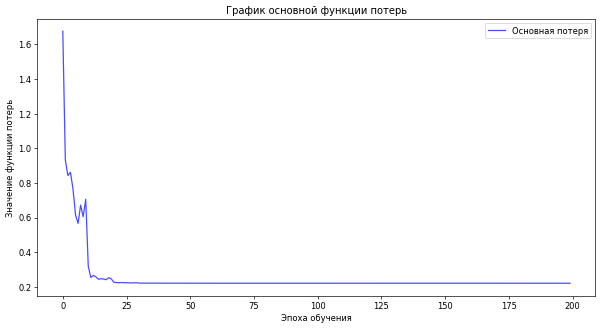

In [6]:
LV.show_training_loss()

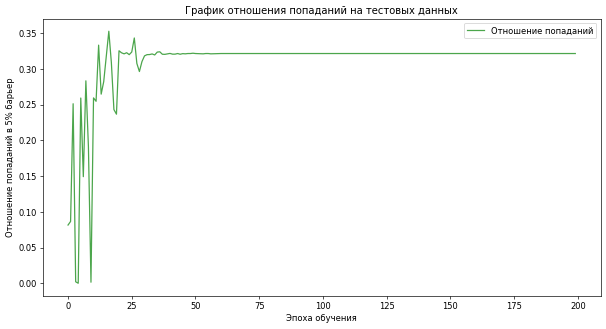

In [7]:
LV.show_test_tube()

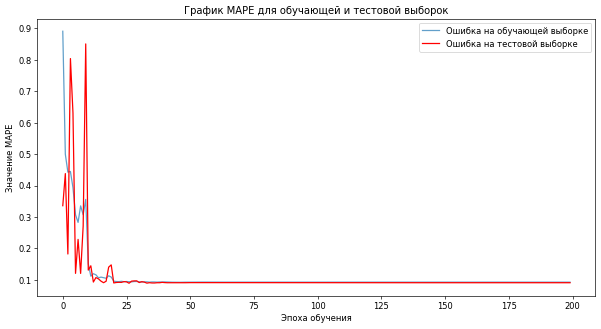

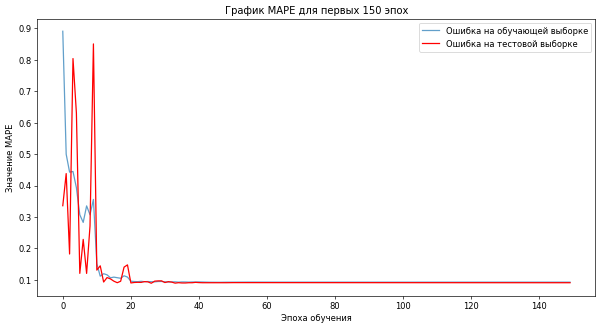

In [8]:
LV.show_mape()

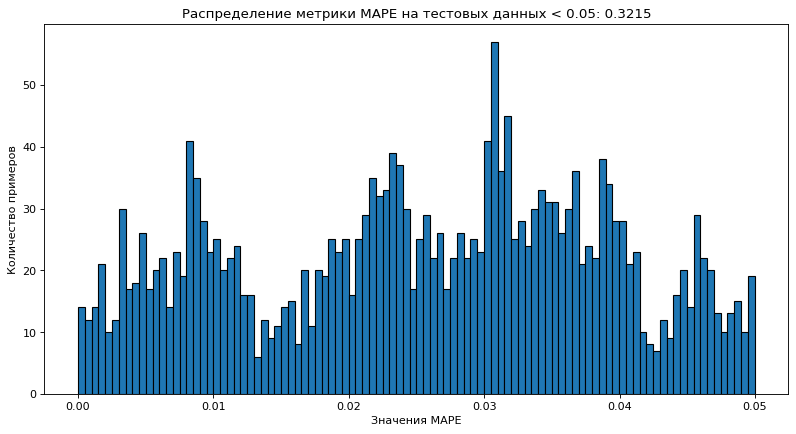

Процент значений MAPE < 0.05: 0.3215


In [12]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 5)

Количество записей: 5334
[ 34.218  36.504  38.189  39.795  40.92   41.998  43.031  44.336  45.689
  47.013  48.305  49.565  51.667  54.14   57.206  61.002  65.931  72.824
  79.697  87.181  95.952 108.78  122.97  138.07  155.9   169.9   178.36
 182.65  183.72  182.57  179.87  176.1   171.62  166.65  161.39  155.95
 150.41  144.83  140.71  143.58  150.77  161.11  174.05  189.11  205.77
 224.96  244.01  262.15  278.73  294.71  310.86  327.01  331.27  333.49
 334.31  334.42  334.16  333.71  333.18  332.6   332.    331.38  330.77 ]
[[ 46.13442 ]
 [ 47.776577]
 [ 49.543774]
 [ 51.403965]
 [ 53.266293]
 [ 55.06882 ]
 [ 56.757755]
 [ 58.325794]
 [ 59.76022 ]
 [ 61.08137 ]
 [ 62.342266]
 [ 63.577442]
 [ 64.93081 ]
 [ 66.478195]
 [ 68.299675]
 [ 70.494385]
 [ 73.18912 ]
 [ 76.651436]
 [ 80.80007 ]
 [ 85.66516 ]
 [ 91.38201 ]
 [ 98.458725]
 [106.95881 ]
 [116.85644 ]
 [128.41441 ]
 [140.74156 ]
 [152.73463 ]
 [163.73738 ]
 [173.21309 ]
 [180.87732 ]
 [186.4633  ]
 [189.9452  ]
 [191.40906 ]
 [190

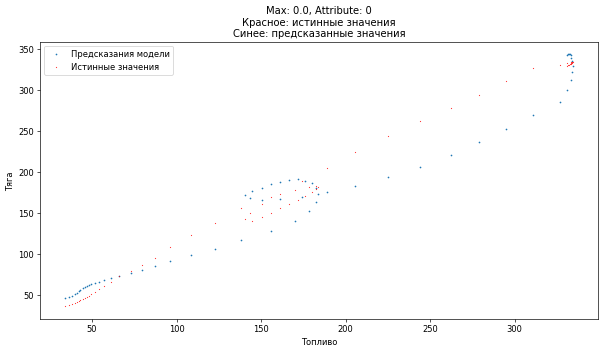

Количество записей: 5334
[ 39.07   40.592  42.254  44.272  46.305  48.363  50.299  52.247  54.272
  56.238  58.056  59.912  62.889  66.678  71.005  75.793  81.228  87.345
  96.613 107.74  119.34  132.59  147.81  162.    175.48  185.88  191.11
 193.17  192.44  189.9   186.46  182.35  177.58  172.37  166.87  161.2
 155.44  149.64  145.38  148.15  155.43  165.91  178.96  194.03  211.99
 230.42  248.39  265.33  281.34  297.69  313.71  327.45  332.45  334.9
 335.77  335.86  335.57  335.1   334.54  333.94  333.32  332.7   332.07 ]
[[ 51.513874]
 [ 53.086666]
 [ 54.762547]
 [ 56.554295]
 [ 58.43311 ]
 [ 60.393307]
 [ 62.360325]
 [ 64.26848 ]
 [ 66.134514]
 [ 68.026695]
 [ 69.92166 ]
 [ 71.81737 ]
 [ 73.87614 ]
 [ 76.214325]
 [ 78.89348 ]
 [ 81.96767 ]
 [ 85.495575]
 [ 89.53366 ]
 [ 94.54584 ]
 [100.73952 ]
 [108.06732 ]
 [116.63112 ]
 [126.55776 ]
 [137.49178 ]
 [149.19104 ]
 [161.0145  ]
 [172.02878 ]
 [181.62096 ]
 [189.35197 ]
 [195.07945 ]
 [198.80563 ]
 [200.53868 ]
 [200.46458 ]
 [198.7

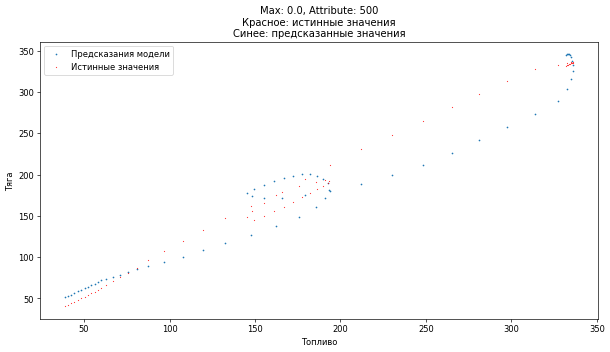

Количество записей: 5334
[ 43.751  46.275  48.617  51.11   53.768  56.509  59.943  63.18   65.93
  68.258  70.34   72.143  74.778  78.112  82.205  88.705  96.526 105.18
 114.91  126.24  138.89  151.21  163.26  175.05  186.7   196.11  199.55
 199.41  197.15  193.67  189.5   184.93  180.12  175.29  170.48  165.24
 159.72  154.03  149.85  152.7   159.93  170.5   183.56  199.92  217.29
 234.76  251.91  267.85  284.32  300.37  314.32  328.81  334.14  336.6
 337.4   337.42  337.08  336.58  336.    335.39  334.76  334.13  333.49 ]
[[ 55.820286]
 [ 57.68785 ]
 [ 59.728184]
 [ 61.918053]
 [ 64.23331 ]
 [ 66.63673 ]
 [ 69.22811 ]
 [ 71.94336 ]
 [ 74.68977 ]
 [ 77.3806  ]
 [ 79.970955]
 [ 82.43274 ]
 [ 84.90837 ]
 [ 87.501884]
 [ 90.32414 ]
 [ 93.71788 ]
 [ 97.85034 ]
 [102.81174 ]
 [108.724625]
 [115.74653 ]
 [123.98418 ]
 [133.20848 ]
 [143.22366 ]
 [153.84703 ]
 [164.83951 ]
 [175.71983 ]
 [185.46988 ]
 [193.55214 ]
 [199.6811  ]
 [203.77141 ]
 [205.97653 ]
 [206.46674 ]
 [205.4186  ]
 [203.03

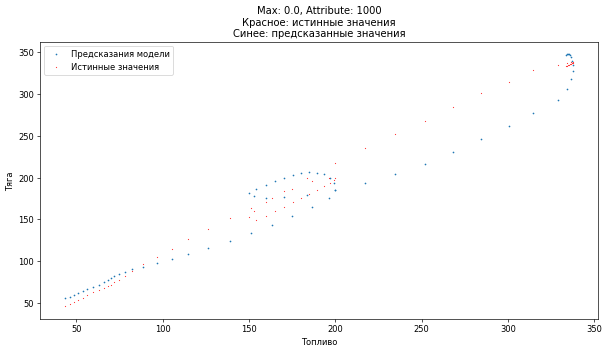

Количество записей: 5334
[ 49.136  52.186  55.936  60.293  64.     67.328  70.373  73.122  75.567
  78.274  80.993  83.358  86.8    91.177  96.664 103.35  111.13  120.27
 130.43  140.83  151.37  162.    172.59  184.11  195.03  202.42  204.16
 202.55  199.68  196.02  191.88  187.45  182.75  177.65  172.53  167.37
 162.52  157.42  153.68  156.87  164.25  174.86  189.14  204.91  221.47
 238.23  254.28  270.75  286.97  301.07  315.72  330.66  335.98  337.96
 337.66  337.31  336.94  336.55  336.14  335.72  335.28  334.84  334.4  ]
[[ 59.822453]
 [ 62.119144]
 [ 64.74832 ]
 [ 67.759   ]
 [ 70.98016 ]
 [ 74.29123 ]
 [ 77.588104]
 [ 80.78785 ]
 [ 83.88305 ]
 [ 86.91527 ]
 [ 89.87811 ]
 [ 92.68736 ]
 [ 95.50772 ]
 [ 98.5255  ]
 [101.92432 ]
 [105.88904 ]
 [110.55292 ]
 [116.08055 ]
 [122.534546]
 [129.84962 ]
 [137.9722  ]
 [146.76106 ]
 [156.07417 ]
 [165.94135 ]
 [176.13351 ]
 [185.9754  ]
 [194.50562 ]
 [201.23448 ]
 [206.10245 ]
 [209.16405 ]
 [210.55597 ]
 [210.43527 ]
 [208.88719 ]
 [206.

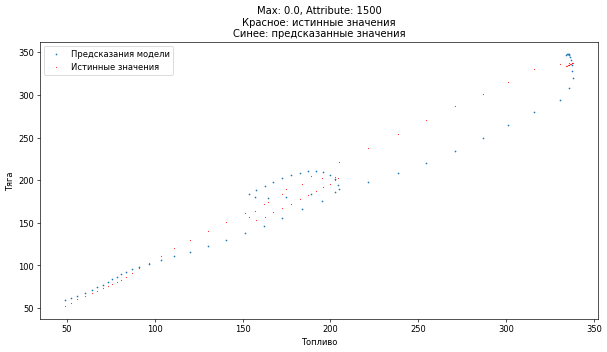

Количество записей: 5334
[ 46.043  48.125  50.967  53.678  56.455  59.413  62.303  64.966  67.461
  70.225  72.635  74.464  77.191  80.772  85.223  90.57   96.639 104.96
 115.5   126.51  138.6   150.32  163.94  176.89  189.28  198.42  202.32
 202.93  201.35  198.35  194.36  189.59  184.32  178.71  172.92  167.01
 161.07  155.13  150.79  153.86  161.73  172.97  186.78  202.54  219.48
 238.75  257.73  275.59  291.78  307.59  323.47  339.43  345.18  346.71
 347.16  347.05  346.67  346.16  345.59  344.99  344.37  343.74  343.12 ]
[[ 57.80067 ]
 [ 59.683453]
 [ 61.812717]
 [ 64.110306]
 [ 66.533875]
 [ 69.06587 ]
 [ 71.63442 ]
 [ 74.21528 ]
 [ 76.80575 ]
 [ 79.44388 ]
 [ 82.06551 ]
 [ 84.53723 ]
 [ 87.02934 ]
 [ 89.67169 ]
 [ 92.58358 ]
 [ 95.90113 ]
 [ 99.70997 ]
 [104.335205]
 [110.04159 ]
 [116.80951 ]
 [124.74279 ]
 [133.59657 ]
 [143.51721 ]
 [154.23253 ]
 [165.50061 ]
 [176.69351 ]
 [186.81142 ]
 [195.29468 ]
 [201.90723 ]
 [206.53973 ]
 [209.2892  ]
 [210.14168 ]
 [209.27534 ]
 [206.

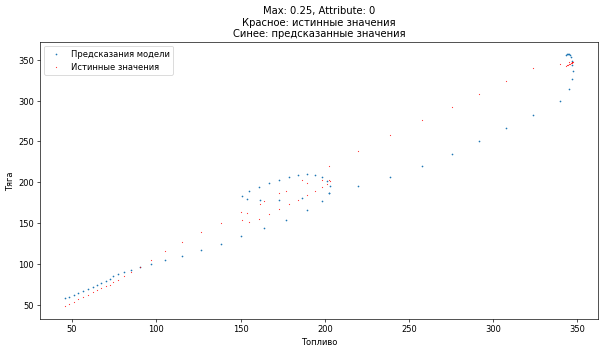

Количество записей: 5334
[ 51.316  54.519  57.984  61.602  65.104  69.269  72.666  75.702  78.375
  80.692  82.665  84.309  87.048  90.666  95.914 103.18  110.95  119.95
 129.87  139.49  151.48  163.25  174.78  186.08  196.87  204.65  207.59
 207.3   204.83  201.36  197.27  192.71  187.87  182.76  177.25  171.48
 165.57  159.57  155.2   158.25  166.02  177.23  191.    206.51  224.74
 243.34  261.2   277.82  293.7   309.75  325.99  341.09  345.42  347.46
 348.09  348.04  347.67  347.16  346.57  345.95  345.32  344.68  344.04 ]
[[ 61.76505 ]
 [ 64.10545 ]
 [ 66.73308 ]
 [ 69.6085  ]
 [ 72.6671  ]
 [ 75.968544]
 [ 79.32708 ]
 [ 82.65891 ]
 [ 85.89639 ]
 [ 88.97687 ]
 [ 91.85428 ]
 [ 94.48292 ]
 [ 97.05709 ]
 [ 99.737854]
 [102.75009 ]
 [106.44462 ]
 [110.85324 ]
 [116.12811 ]
 [122.34697 ]
 [129.36154 ]
 [137.49382 ]
 [146.51689 ]
 [156.23456 ]
 [166.45958 ]
 [176.91399 ]
 [187.04866 ]
 [196.03787 ]
 [203.40303 ]
 [208.95122 ]
 [212.57442 ]
 [214.41136 ]
 [214.60605 ]
 [213.32486 ]
 [210.

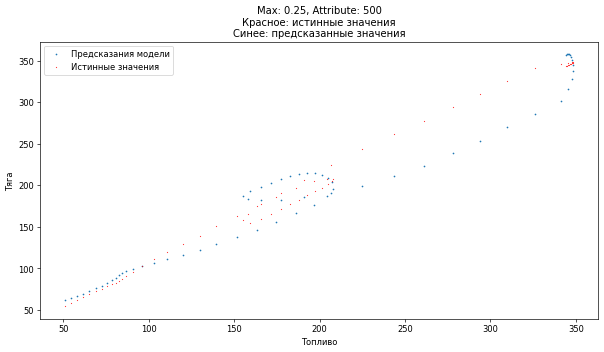

Количество записей: 5334
[ 57.322  61.483  66.387  70.781  74.896  78.694  82.078  85.041  87.915
  91.099  93.237  94.814  97.98  102.37  107.92  114.58  122.12  129.88
 139.88  150.25  160.73  171.29  181.74  191.97  202.56  210.24  212.01
 210.61  207.48  203.43  198.88  194.05  189.25  184.54  179.61  174.52
 169.14  163.46  159.31  162.52  170.29  181.4   194.94  211.63  229.36
 246.89  263.83  279.69  295.85  312.36  327.31  341.52  346.48  348.67
 349.3   349.22  348.83  348.29  347.69  347.06  346.42  345.77  345.12 ]
[[ 65.58927 ]
 [ 68.58963 ]
 [ 72.022644]
 [ 75.738075]
 [ 79.62912 ]
 [ 83.592094]
 [ 87.47367 ]
 [ 91.20416 ]
 [ 94.7872  ]
 [ 98.26759 ]
 [101.47418 ]
 [104.30864 ]
 [107.098694]
 [110.057625]
 [113.38777 ]
 [117.273056]
 [121.81539 ]
 [126.98719 ]
 [133.07243 ]
 [140.08067 ]
 [147.95735 ]
 [156.54169 ]
 [165.65038 ]
 [175.12027 ]
 [184.90964 ]
 [194.44928 ]
 [202.78377 ]
 [209.39241 ]
 [214.11752 ]
 [216.98918 ]
 [218.15321 ]
 [217.76799 ]
 [216.0359  ]
 [213.

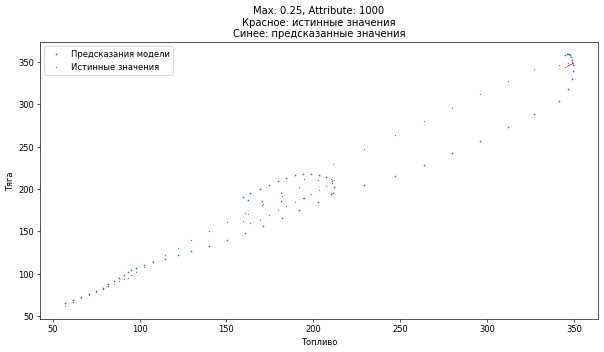

Количество записей: 5334
[ 64.379  69.448  74.235  78.665  82.707  87.872  92.394  95.93   98.801
 100.98  102.54  103.32  106.17  110.2   115.24  121.23  129.2   138.
 147.25  156.85  166.73  176.56  186.46  197.3   207.39  213.93  214.53
 212.37  209.07  205.09  200.71  196.09  191.11  185.91  180.7   175.89
 170.99  165.94  162.47  166.17  174.    185.01  199.72  216.02  232.81
 249.65  265.59  281.78  298.54  313.47  327.92  342.69  347.45  349.18
 349.46  349.18  348.69  348.13  347.53  346.92  346.31  345.69  345.08 ]
[[ 69.914856]
 [ 73.680046]
 [ 77.765594]
 [ 82.044525]
 [ 86.38011 ]
 [ 90.91911 ]
 [ 95.48979 ]
 [ 99.88693 ]
 [104.025024]
 [107.74341 ]
 [111.00986 ]
 [113.76578 ]
 [116.41906 ]
 [119.2001  ]
 [122.21042 ]
 [125.642044]
 [129.82095 ]
 [134.84026 ]
 [140.72777 ]
 [147.47754 ]
 [155.06941 ]
 [163.28319 ]
 [171.9938  ]
 [181.2363  ]
 [190.77348 ]
 [199.88602 ]
 [207.60016 ]
 [213.5613  ]
 [217.72008 ]
 [220.13478 ]
 [220.96275 ]
 [220.35005 ]
 [218.35918 ]
 [215.16

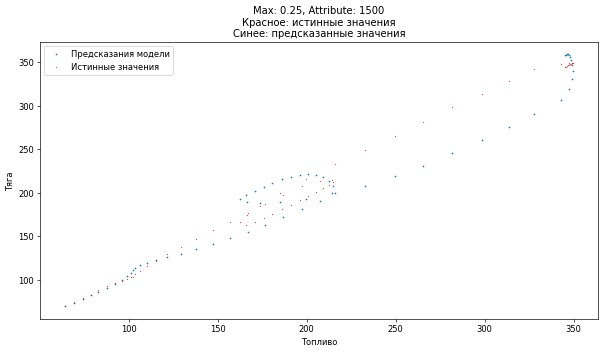

Количество записей: 5334
[ 99.812 106.76  112.66  117.67  122.35  126.34  129.13  130.58  131.26
 131.42  131.1   130.42  132.74  136.8   142.15  148.65  156.12  164.49
 173.49  183.62  194.67  205.43  215.76  225.68  235.23  241.35  241.85
 239.48  235.54  231.    226.12  221.02  215.8   210.49  205.13  199.72
 194.28  188.55  184.65  188.93  198.54  211.55  226.84  243.49  260.78
 278.24  297.01  314.75  331.36  346.98  362.75  378.53  384.08  385.66
 385.71  385.26  384.65  383.98  383.3   382.6   381.91  381.22  380.52 ]
[[ 94.678696]
 [101.1155  ]
 [107.67161 ]
 [114.14147 ]
 [120.36372 ]
 [126.17872 ]
 [131.39656 ]
 [135.83824 ]
 [139.43031 ]
 [142.179   ]
 [144.16338 ]
 [145.47203 ]
 [146.72224 ]
 [148.23088 ]
 [150.23671 ]
 [152.96922 ]
 [156.5714  ]
 [161.13545 ]
 [166.69014 ]
 [173.32677 ]
 [181.09099 ]
 [189.64314 ]
 [198.73193 ]
 [208.15105 ]
 [217.72615 ]
 [226.82285 ]
 [234.5175  ]
 [240.44002 ]
 [244.42964 ]
 [246.53777 ]
 [246.95993 ]
 [245.88168 ]
 [243.4888  ]
 [239.9

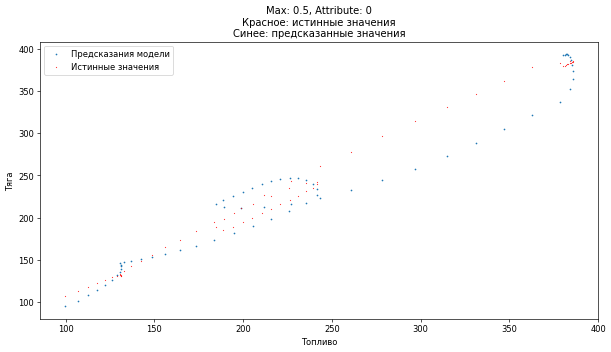

Количество записей: 5334
[103.29 110.61 117.22 123.54 128.38 131.16 133.07 134.18 134.55 134.37
 133.78 132.89 135.03 139.08 144.59 151.25 158.86 167.27 177.38 187.87
 198.14 208.19 217.96 227.46 236.66 242.5  242.79 240.34 236.42 231.74
 226.79 221.66 216.43 211.13 205.79 200.41 195.01 189.57 186.53 191.2
 200.63 213.43 228.5  244.92 262.02 280.71 298.66 315.71 331.48 347.36
 363.3  379.18 384.21 385.24 385.03 384.5  383.88 383.25 382.6  381.96
 381.31 380.67 380.02]
[[ 97.213776]
 [103.962814]
 [110.88985 ]
 [117.86109 ]
 [124.562164]
 [130.6339  ]
 [135.94943 ]
 [140.34848 ]
 [143.79482 ]
 [146.35667 ]
 [148.10951 ]
 [149.13742 ]
 [150.04033 ]
 [151.23282 ]
 [153.05136 ]
 [155.69356 ]
 [159.25993 ]
 [163.81836 ]
 [169.5692  ]
 [176.45497 ]
 [184.32819 ]
 [192.87746 ]
 [201.8606  ]
 [211.09732 ]
 [220.44476 ]
 [229.2829  ]
 [236.70966 ]
 [242.32327 ]
 [246.02446 ]
 [247.89836 ]
 [248.14195 ]
 [246.93204 ]
 [244.44322 ]
 [240.84477 ]
 [236.44624 ]
 [231.63785 ]
 [226.61499 ]
 [221.475

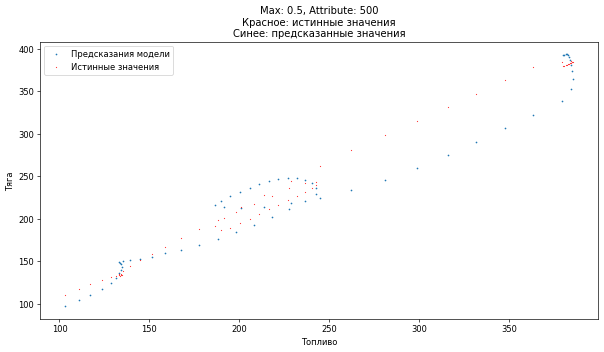

Количество записей: 5334
[106.9  115.69 123.22 128.72 132.36 135.01 136.65 137.42 137.54 137.17
 136.43 135.42 137.45 141.47 146.98 153.69 161.71 171.27 181.04 190.85
 200.6  210.21 219.63 228.83 237.78 243.42 243.53 240.99 237.09 232.5
 227.5  222.29 217.02 211.71 206.38 201.01 195.63 190.23 187.24 192.05
 201.63 214.53 229.62 246.01 264.34 282.41 299.7  315.89 331.87 348.
 363.8  379.11 384.02 384.77 384.42 383.82 383.17 382.51 381.85 381.18
 380.52 379.85 379.19]
[[ 99.89006 ]
 [107.07357 ]
 [114.534134]
 [121.866165]
 [128.72307 ]
 [134.9081  ]
 [140.22789 ]
 [144.50867 ]
 [147.80742 ]
 [150.18599 ]
 [151.67299 ]
 [152.3994  ]
 [153.06108 ]
 [154.10103 ]
 [155.79237 ]
 [158.3452  ]
 [161.91939 ]
 [166.68764 ]
 [172.58362 ]
 [179.50128 ]
 [187.3254  ]
 [195.75032 ]
 [204.56416 ]
 [213.6012  ]
 [222.72343 ]
 [231.30716 ]
 [238.41808 ]
 [243.75616 ]
 [247.25418 ]
 [248.99214 ]
 [249.13313 ]
 [247.8395  ]
 [245.28662 ]
 [241.64299 ]
 [237.21648 ]
 [232.39563 ]
 [227.36949 ]
 [222.23323

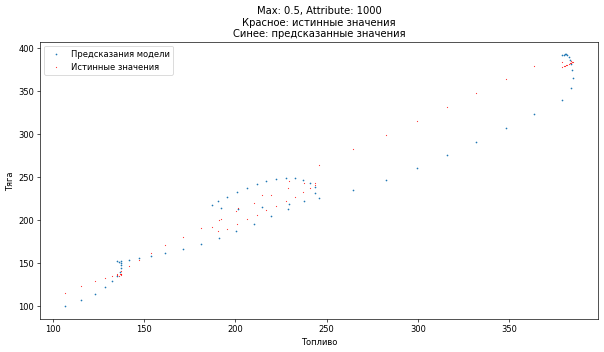

Количество записей: 5334
[113.76 122.49 128.76 133.32 136.77 139.02 140.29 140.8  140.71 140.18
 139.32 138.21 140.16 144.13 149.67 157.26 165.7  174.57 183.78 193.14
 202.51 211.81 220.96 229.94 239.28 245.16 244.73 241.58 237.25 232.41
 227.51 222.65 217.55 212.28 206.92 201.56 196.19 190.81 187.76 192.73
 202.48 215.48 230.61 248.16 266.12 283.55 300.23 316.27 332.52 348.33
 363.85 379.43 384.63 385.11 384.62 383.97 383.28 382.59 381.9  381.21
 380.53 379.84 379.15]
[[104.20474]
 [111.90132]
 [119.62236]
 [127.04811]
 [133.92885]
 [140.01547]
 [145.12389]
 [149.16528]
 [152.21202]
 [154.22661]
 [155.3777 ]
 [155.85855]
 [156.34157]
 [157.2265 ]
 [158.8071 ]
 [161.4267 ]
 [165.14558]
 [169.94554]
 [175.79247]
 [182.59154]
 [190.24379]
 [198.47063]
 [207.06425]
 [215.86601]
 [224.79727]
 [233.23033]
 [240.15997]
 [245.27364]
 [248.52257]
 [250.01172]
 [249.96535]
 [248.57767]
 [245.98277]
 [242.29271]
 [237.81088]
 [232.971  ]
 [227.96278]
 [222.8686 ]
 [218.10735]
 [214.96138]
 [214.

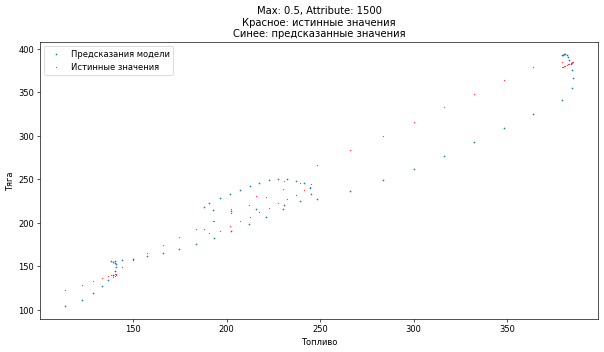

Количество записей: 5334
[187.44 193.59 197.26 199.01 199.47 199.07 198.15 196.9  195.44 193.86
 192.2  190.5  193.43 198.84 205.91 214.12 223.06 232.46 242.08 251.46
 261.55 271.32 280.65 289.73 298.66 302.99 301.09 297.02 292.06 286.72
 281.21 275.63 270.01 264.32 258.6  252.84 247.06 241.54 238.76 246.47
 259.06 275.23 292.45 310.13 327.92 345.58 363.02 380.31 397.41 413.49
 429.77 446.08 450.39 450.34 449.71 449.   448.29 447.58 446.87 446.16
 445.45 444.74 444.03]
[[162.77022]
 [173.95433]
 [184.07784]
 [192.81172]
 [199.92902]
 [205.26826]
 [208.89882]
 [210.98512]
 [211.87389]
 [211.89426]
 [211.29254]
 [210.27151]
 [209.7434 ]
 [210.13805]
 [211.69202]
 [214.53094]
 [218.63148]
 [223.93484]
 [230.34944]
 [237.6976 ]
 [245.98438]
 [254.79198]
 [263.851  ]
 [273.00403]
 [282.1423 ]
 [290.47382]
 [297.04016]
 [301.6446 ]
 [304.3234 ]
 [305.18484]
 [304.45822]
 [302.34048]
 [299.00986]
 [294.62128]
 [289.5456 ]
 [284.196  ]
 [278.71945]
 [273.22134]
 [268.174  ]
 [265.2573 ]
 [265.

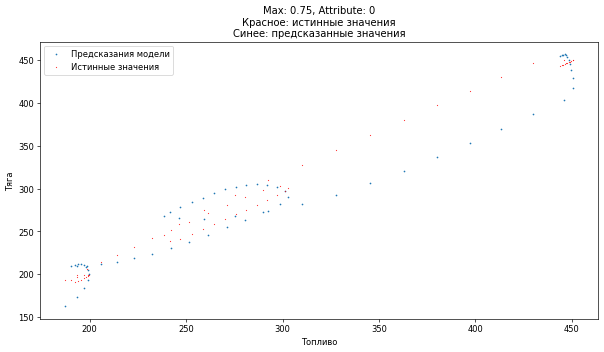

Количество записей: 5334
[188.97 194.55 197.63 198.94 199.07 198.47 197.41 196.08 194.58 192.97
 191.31 189.61 192.47 197.86 204.91 213.08 221.97 231.29 240.66 250.9
 260.57 269.89 279.01 288.   296.9  301.18 299.23 295.12 290.13 284.77
 279.26 273.68 268.05 262.41 256.73 251.   245.23 239.43 236.51 244.8
 257.98 273.55 290.58 308.23 326.   343.63 361.11 378.27 394.48 411.33
 427.6  443.83 448.26 448.16 447.5  446.78 446.05 445.33 444.6  443.87
 443.14 442.41 441.69]
[[165.03136]
 [176.06851]
 [185.92606]
 [194.31291]
 [201.00304]
 [205.9838 ]
 [209.32307]
 [211.09961]
 [211.74428]
 [211.56378]
 [210.81561]
 [209.69862]
 [209.09831]
 [209.4441 ]
 [210.9623 ]
 [213.77028]
 [217.83989]
 [223.10469]
 [229.44518]
 [236.86806]
 [245.15279]
 [253.89069]
 [262.85947]
 [271.90707]
 [280.94907]
 [289.1935 ]
 [295.67596]
 [300.2151 ]
 [302.78485]
 [303.5696 ]
 [302.7998 ]
 [300.65518]
 [297.30423]
 [292.9078 ]
 [287.83472]
 [282.49533]
 [277.0319 ]
 [271.50143]
 [266.403  ]
 [263.53464]
 [263.47

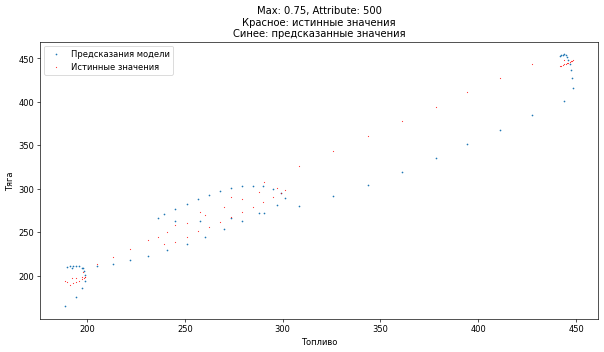

Количество записей: 5334
[189.59 194.76 197.47 198.48 198.4  197.67 196.53 195.15 193.63 192.02
 190.35 188.66 191.46 196.82 203.85 211.98 220.82 230.38 240.3  249.88
 259.21 268.38 277.38 286.26 295.08 299.73 297.62 293.43 288.39 283.01
 277.47 271.87 266.24 260.59 254.92 249.24 243.5  237.71 234.85 243.19
 256.08 271.66 288.74 306.43 324.19 341.86 359.13 375.54 392.86 409.32
 425.71 442.28 446.88 446.74 446.05 445.31 444.57 443.82 443.08 442.33
 441.59 440.84 440.1 ]
[[166.22127]
 [177.1498 ]
 [186.80022]
 [194.89513]
 [201.33113]
 [206.0976 ]
 [209.25764]
 [210.82596]
 [211.30733]
 [210.99916]
 [210.16008]
 [208.98448]
 [208.33954]
 [208.65245]
 [210.14523]
 [212.92747]
 [216.9698 ]
 [222.24983]
 [228.69464]
 [236.10432]
 [244.32361]
 [252.98106]
 [261.85034]
 [270.7962 ]
 [279.7378 ]
 [287.95328]
 [294.37396]
 [298.81747]
 [301.33267]
 [302.0802 ]
 [301.2819 ]
 [299.11575]
 [295.75067]
 [291.34482]
 [286.24496]
 [280.89877]
 [275.43906]
 [269.91656]
 [264.83682]
 [261.99445]
 [261.

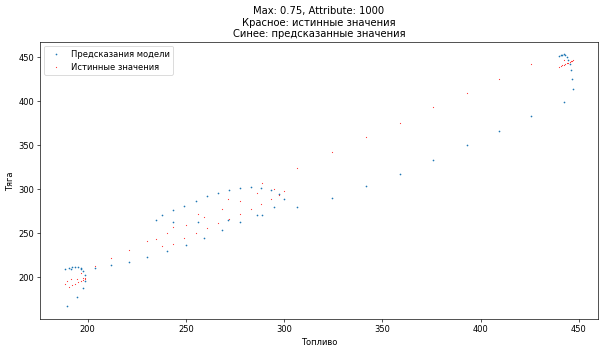

Количество записей: 5334
[190.29 194.96 197.25 197.76 197.42 196.59 195.45 194.1  192.62 191.06
 189.45 187.8  190.55 195.83 202.8  210.88 220.23 229.8  239.21 248.5
 257.66 266.72 275.69 284.59 293.45 298.44 296.42 292.03 286.88 281.43
 275.86 270.23 264.58 258.91 253.24 247.55 241.83 236.08 233.28 241.66
 254.24 269.91 287.07 304.76 322.59 339.98 356.97 374.41 391.1  407.75
 424.5  441.44 446.2  446.01 445.3  444.54 443.78 443.02 442.26 441.49
 440.73 439.97 439.21]
[[168.128  ]
 [178.72156]
 [187.98631]
 [195.69926]
 [201.7888 ]
 [206.26668]
 [209.10097]
 [210.45601]
 [210.7671 ]
 [210.34233]
 [209.43898]
 [208.23656]
 [207.58751]
 [207.89795]
 [209.38347]
 [212.15031]
 [216.25957]
 [221.60002]
 [228.01357]
 [235.34772]
 [243.46404]
 [252.01016]
 [260.78284]
 [269.64825]
 [278.5278 ]
 [286.71863]
 [293.13373]
 [297.56888]
 [300.07678]
 [300.8125 ]
 [300.00208]
 [297.8233 ]
 [294.44135]
 [290.01517]
 [284.87912]
 [279.49487]
 [274.01547]
 [268.48862]
 [263.41852]
 [260.59348]
 [260.4

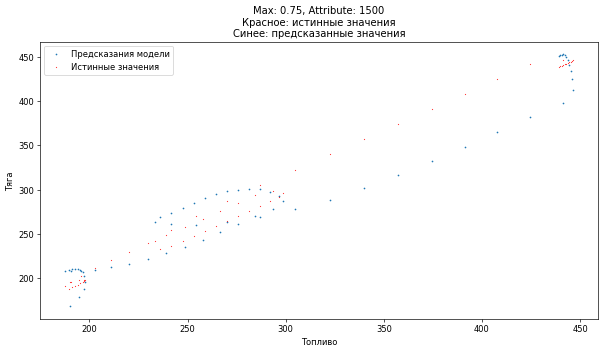

Количество записей: 5334
[287.72 287.76 286.62 285.   283.17 281.26 279.31 277.34 275.37 273.38
 271.39 269.39 274.42 282.75 292.44 302.67 313.06 323.45 333.76 343.97
 354.09 364.12 374.07 383.88 392.83 396.11 392.49 387.36 381.82 376.13
 369.98 363.64 357.21 350.74 344.23 337.68 330.9  324.16 320.98 332.68
 349.92 369.18 388.87 407.14 424.78 442.25 460.85 478.79 496.66 514.79
 533.18 551.74 555.68 555.1  554.28 553.44 552.61 551.78 550.95 550.12
 549.28 548.45 547.62]
[[255.21233]
 [268.41202]
 [279.0129 ]
 [287.03104]
 [292.48032]
 [295.49908]
 [296.50803]
 [295.9062 ]
 [294.54535]
 [292.85208]
 [291.0192 ]
 [289.12558]
 [288.35397]
 [289.142  ]
 [291.5708 ]
 [295.60422]
 [301.05557]
 [307.7493 ]
 [315.53436]
 [324.24463]
 [333.75183]
 [343.56317]
 [353.44955]
 [363.3048 ]
 [372.96188]
 [381.50528]
 [387.9192 ]
 [392.16562]
 [394.37164]
 [394.74664]
 [393.47226]
 [390.7116 ]
 [386.6393 ]
 [381.46405]
 [375.6175 ]
 [369.54694]
 [363.32272]
 [356.99234]
 [351.158  ]
 [348.2274 ]
 [348.

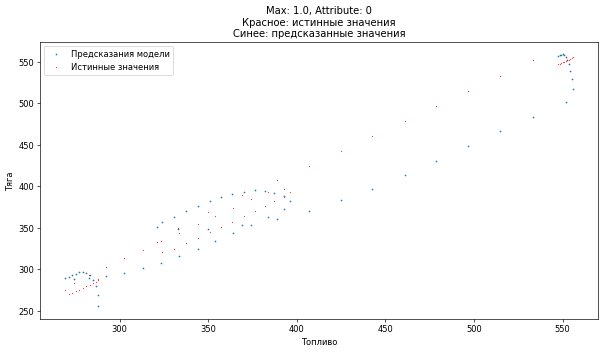

Количество записей: 5334
[283.32 283.27 282.12 280.51 278.72 276.85 274.95 273.01 271.06 269.09
 267.12 265.14 270.01 278.16 287.7  297.81 308.1  318.4  328.63 338.79
 348.86 358.89 368.29 377.13 385.78 389.16 385.51 380.3  374.74 369.09
 363.37 357.63 351.77 345.51 339.1  332.61 326.09 319.45 316.12 327.54
 344.62 363.79 382.27 400.15 418.01 436.73 454.94 473.06 491.28 509.72
 528.49 547.43 551.52 550.91 550.07 549.22 548.37 547.53 546.68 545.83
 544.98 544.13 543.29]
[[252.58276]
 [265.45102]
 [275.74942]
 [283.45676]
 [288.60666]
 [291.4752 ]
 [292.41104]
 [291.77655]
 [290.4189 ]
 [288.74408]
 [286.93555]
 [285.06784]
 [284.29266]
 [285.0446 ]
 [287.4143 ]
 [291.37094]
 [296.73535]
 [303.336  ]
 [311.0241 ]
 [319.63947]
 [329.05344]
 [338.79138]
 [348.53244]
 [358.10794]
 [367.4714 ]
 [375.76904]
 [381.96262]
 [386.01132]
 [388.04333]
 [388.2732 ]
 [386.94284]
 [384.2633 ]
 [380.41177]
 [375.48816]
 [369.87878]
 [364.0296 ]
 [358.04642]
 [351.946  ]
 [346.28772]
 [343.44366]
 [344.

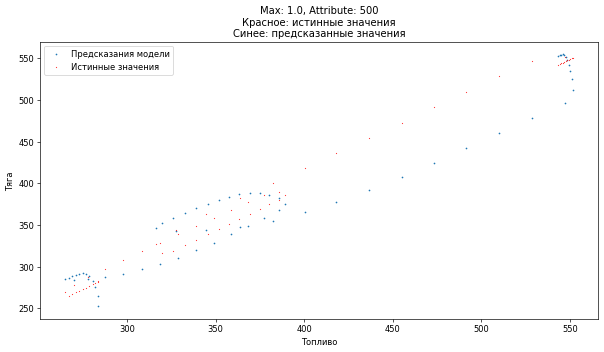

Количество записей: 5334
[278.99 278.89 277.72 276.12 274.34 272.49 270.6  268.69 266.78 264.86
 262.92 260.96 265.65 273.64 283.06 293.08 303.29 313.52 323.7  333.81
 343.68 352.82 361.67 370.45 379.21 382.79 379.11 373.83 368.2  362.49
 356.77 351.02 345.24 339.44 333.68 327.56 321.19 314.71 311.58 322.64
 339.62 357.76 375.73 393.78 412.78 431.26 449.64 468.1  486.72 505.5
 524.62 543.79 547.96 547.34 546.49 545.64 544.79 543.93 543.08 542.23
 541.37 540.52 539.67]
[[249.94893]
 [262.49533]
 [272.45764]
 [279.84567]
 [284.75616]
 [287.5014 ]
 [288.34482]
 [287.68015]
 [286.32333]
 [284.66742]
 [282.8836 ]
 [281.0419 ]
 [280.25995]
 [280.97897]
 [283.29745]
 [287.19162]
 [292.48523]
 [299.00964]
 [306.6191 ]
 [315.15485]
 [324.46518]
 [333.97522]
 [343.43118]
 [352.7455 ]
 [361.89423]
 [370.04257]
 [376.10764]
 [380.03482]
 [381.95346]
 [382.0828 ]
 [380.712  ]
 [378.02438]
 [374.18134]
 [369.3355 ]
 [363.89178]
 [358.25504]
 [352.4938 ]
 [346.62186]
 [341.2008 ]
 [338.5072 ]
 [339.2

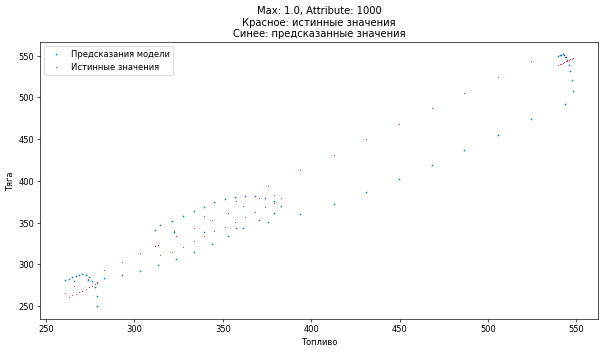

Количество записей: 5334
[274.77 274.61 273.43 271.83 270.06 268.22 266.35 264.46 262.57 260.66
 258.76 256.85 261.37 269.21 278.55 288.49 298.64 308.83 319.   328.54
 337.64 346.56 355.44 364.31 373.59 377.64 373.33 367.67 362.07 356.41
 350.65 344.87 339.09 333.27 327.43 321.58 315.74 309.8  307.11 317.96
 334.1  351.63 369.63 388.96 407.7  426.36 445.07 463.92 482.93 502.08
 521.4  540.83 545.13 544.48 543.61 542.74 541.87 541.01 540.14 539.27
 538.4  537.53 536.66]
[[247.75209]
 [259.8322 ]
 [269.37125]
 [276.37424]
 [281.0515 ]
 [283.6628 ]
 [284.417  ]
 [283.72205]
 [282.36172]
 [280.71298]
 [278.94543]
 [277.12698]
 [276.3381 ]
 [277.0259 ]
 [279.30197]
 [283.14188]
 [288.37698]
 [294.84198]
 [302.39594]
 [310.78796]
 [319.84134]
 [329.0939 ]
 [338.3282 ]
 [347.46445]
 [356.5497 ]
 [364.72443]
 [370.71634]
 [374.5227 ]
 [376.3662 ]
 [376.47003]
 [375.08545]
 [372.3809 ]
 [368.51587]
 [363.61987]
 [358.0939 ]
 [352.46332]
 [346.81454]
 [341.13077]
 [335.9509 ]
 [333.44318]
 [334.

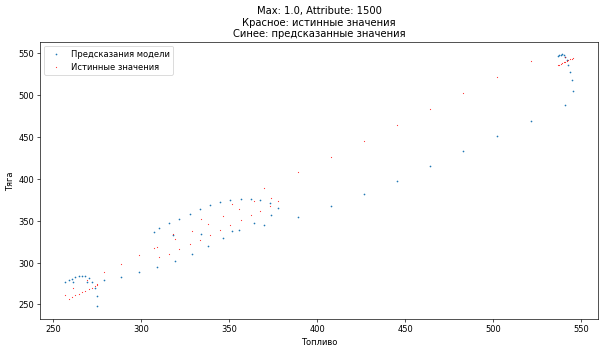

In [11]:
LV.show_predictions(model,df,pd_params,device)